In [40]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Healthcare-Diabetes.csv')

In [3]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [5]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [6]:
df.shape

(2768, 10)

In [7]:
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
len(df)

2768

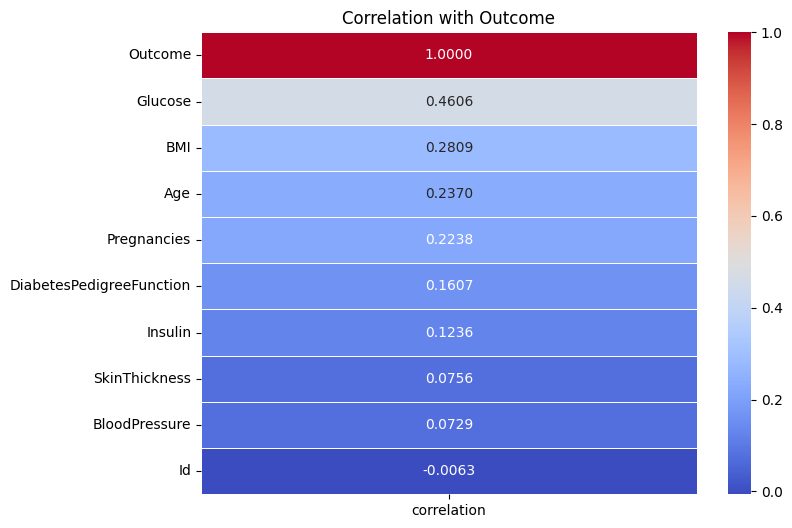

In [9]:
correlation_with_outcome = df.corrwith(df['Outcome']).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_with_outcome, columns=['correlation']), annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)

plt.title('Correlation with Outcome')
plt.show()

In [10]:
Ids = df['Id']
y = df['Outcome']
df = df.drop(columns=['Id','Outcome'])

In [11]:
X = df.values
y=y.values

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(2214, 8)

In [13]:
X_test.shape

(554, 8)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_train

array([[ 0.06624022, -0.38205062, -0.26370701, ...,  0.33882074,
         1.31121966, -0.61604209],
       [-0.8371839 , -0.10045187, -0.57434671, ...,  0.1534034 ,
        -0.64738633, -0.86976266],
       [-0.53604253,  0.05599188, -1.09207955, ...,  1.24118513,
         0.1403139 , -0.61604209],
       ...,
       [ 0.36738159, -0.56978312,  2.01431748, ...,  0.8827116 ,
        -0.51356853,  2.68232527],
       [-0.8371839 , -0.75751562, -0.26370701, ..., -1.71313116,
        -0.53181641, -1.0389097 ],
       [ 0.96966434, -1.25813563,  0.46111896, ...,  1.8097983 ,
        -0.64738633,  0.73713426]])

In [15]:
X_test = sc.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [18]:
accuracy

0.7743682310469314

In [19]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred = model2.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [21]:
accuracy

0.98014440433213

In [22]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model3.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred = model3.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [24]:
accuracy

0.9819494584837545

In [25]:
model4 = XGBClassifier()
model4.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
y_pred = model4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [35]:
accuracy

0.9819494584837545

In [38]:
# Assuming X_train, X_test, y_train, y_test are your data split into training and testing sets
model5 = LinearRegression()
model5.fit(X_train, y_train)


LinearRegression()

In [44]:
y_pred = model5.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
#accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred, average='weighted')
#recall = recall_score(y_test, y_pred, average='weighted')
#f1 = f1_score(y_test, y_pred, average='weighted')
#conf_matrix = confusion_matrix(y_test, y_pred)
mse

0.1655245822465154

In [45]:
import tensorflow as tf
from tensorflow import keras

# Assuming X_train, X_test, y_train, y_test are your data split into training and testing sets
model6 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1)  # Output layer for regression
])

model6.compile(optimizer='adam', loss='mean_squared_error')
model6.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model6.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
#print("Mean Squared Error:", mse)

ModuleNotFoundError: No module named 'tensorflow'